
The Sparks Foundation- GRIPJUNE21
Intern name : Priyankshu Kumar Sarkar
Data Science And Business Analytics Intern at The Sparks Foundation
Task 2: Prediction using Unsupervised ML
Problem Statement: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. **bold text**

**IMPORT LIBRARIES:**

In [ ]:
import numpy as np
import pandas as pd
import sklearn 
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

**Load the data :**

In [28]:
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_data.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris_df.head(10)

NameError: ignored

In [29]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [30]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**How do you find the optimum number of clusters for K Means? How does one determine the value of K?**

We actually do not know the number of clusters. There are several methods to select k that depends on the domain knowledge and rule of thumbs. Elbow method is one of the robust one used to find out the optimal number of clusters. In this method, the sum of distances of observations from their cluster centroids, called **Within-Cluster-Sum-of-Squares (WCSS)**

**Using Elbow method:**

In [31]:
x = iris_data.iloc[:, [0 , 1 , 2 , 3]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1 , 11):
  kmeans = KMeans(n_clusters = i , init = "k-means++", max_iter=300 , n_init=10 , random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
#i above is between 1-10 numbers. init parameter is the random #initialization method  
#we select kmeans++ method. max_iter parameter the maximum number of iterations there can be to 
#find the final clusters when the K-means algorithm is running. we #enter the default value of 300
#the next parameter is n_init which is the number of times the #K_means algorithm will be run with
#different initial centroid.


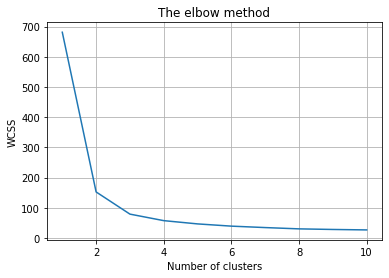

In [32]:
# Plotting the results:

plt.plot(range(1, 11), wcss)
plt.grid()
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

**From the above graph, it is clear that the elbow is forming at k=3. Thus, the optimal value of Number of clusters is 3.**

According to the Elbow graph we deterrmine the clusters number as 3. Applying k-means algorithm to the x dataset.

In [33]:
kmeans = KMeans(n_clusters= 3, init= "k-means++", max_iter=300 , n_init=10 , random_state =0 )
# We are going to use the ( "fit predict method" )that returns for each 
#observation which cluster it belongs to. The cluster to which 
#client belongs and it will return this cluster numbers into a 
#single vector that is  called y K-means
y_kmeans = kmeans.fit_predict(x)

**Visualization:**

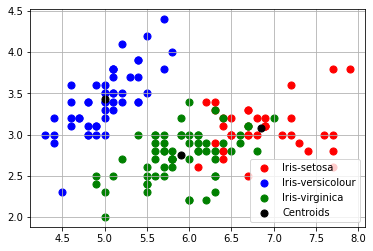

In [34]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1], s=50, c='red', label ='Iris-setosa')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1], s=50, c='blue', label ='Iris-versicolour')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1], s=50, c='green', label ='Iris-virginica')

#Plot the centroid:
plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1], s=50 , c='black', label="Centroids")
plt.grid()
plt.legend()
plt.show()

**Evaluation of Model:**

In [35]:
from sklearn.metrics.cluster import silhouette_score

silhouette_score(x, y_kmeans, metric = 'euclidean')

0.5528190123564091

**Conclusion:**
1. Optimum number of clusters obtained = 3
2. Silhouette score = 0.5528190123564091  which tells us that our model is close to boundry i.e, high accuracy.
